In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import homogeneity_completeness_v_measure, silhouette_score


df = pd.read_csv('iris.csv')
d = {v:i for i, v in enumerate(df['variety'].unique())}
df = df.replace(d)

X = df.drop(['variety'], axis='columns')
y = df['variety']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

#print(kmeans.inertia_)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(homogeneity_completeness_v_measure(y, kmeans.labels_))
print('Silhouette = ',silhouette_score(X,kmeans.labels_))

df['cluster'] = kmeans.labels_
df



[[0.19611111 0.595      0.07830508 0.06083333]
 [0.66773504 0.44310897 0.7571708  0.78205128]
 [0.41203704 0.27690972 0.55896893 0.52083333]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1]
(np.float64(0.7142841808729673), np.float64(0.7146311989656295), np.float64(0.7144576477818988))
Silhouette =  0.48292893354301647


C:\Users\marco\AppData\Local\Temp\ipykernel_50000\609781525.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(d)


,sepal.length,sepal.width,petal.length,petal.width,variety,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


In [2]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df['variety'],df['cluster'])

array([[ 0, 50,  0],
       [47,  0,  3],
       [14,  0, 36]])

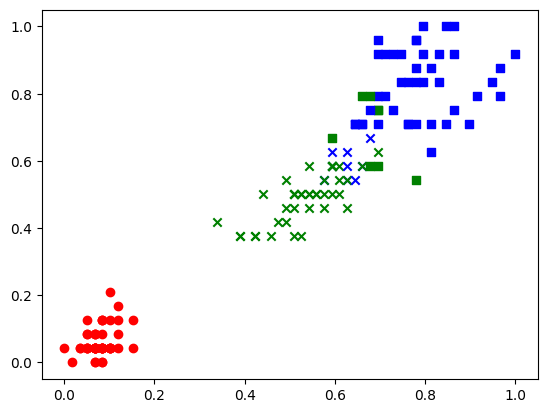

In [4]:
predictions = kmeans.labels_
colors = np.array(['red', 'blue', 'green'])
markers = ['o', 'x', 's']
for i in range(len(X)):
    plt.scatter(X[i,2], X[i,3], marker=markers[y[i]], color=colors[predictions[i]])
plt.show()


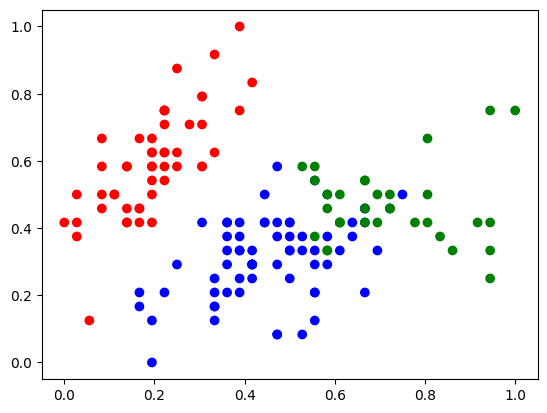

In [8]:
clusters = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X)
predictions = clusters.labels_
colors = np.array(['red', 'blue','green'])
plt.scatter(X[:, 0], X[:, 1], color=colors[predictions])
plt.show()


In [9]:
print(homogeneity_completeness_v_measure(y, clusters.labels_))
print('Silhouette = ',silhouette_score(X,clusters.labels_))

(np.float64(0.7697177990193531), np.float64(0.7982832930540932), np.float64(0.7837403461384024))
Silhouette =  0.5047999262278895


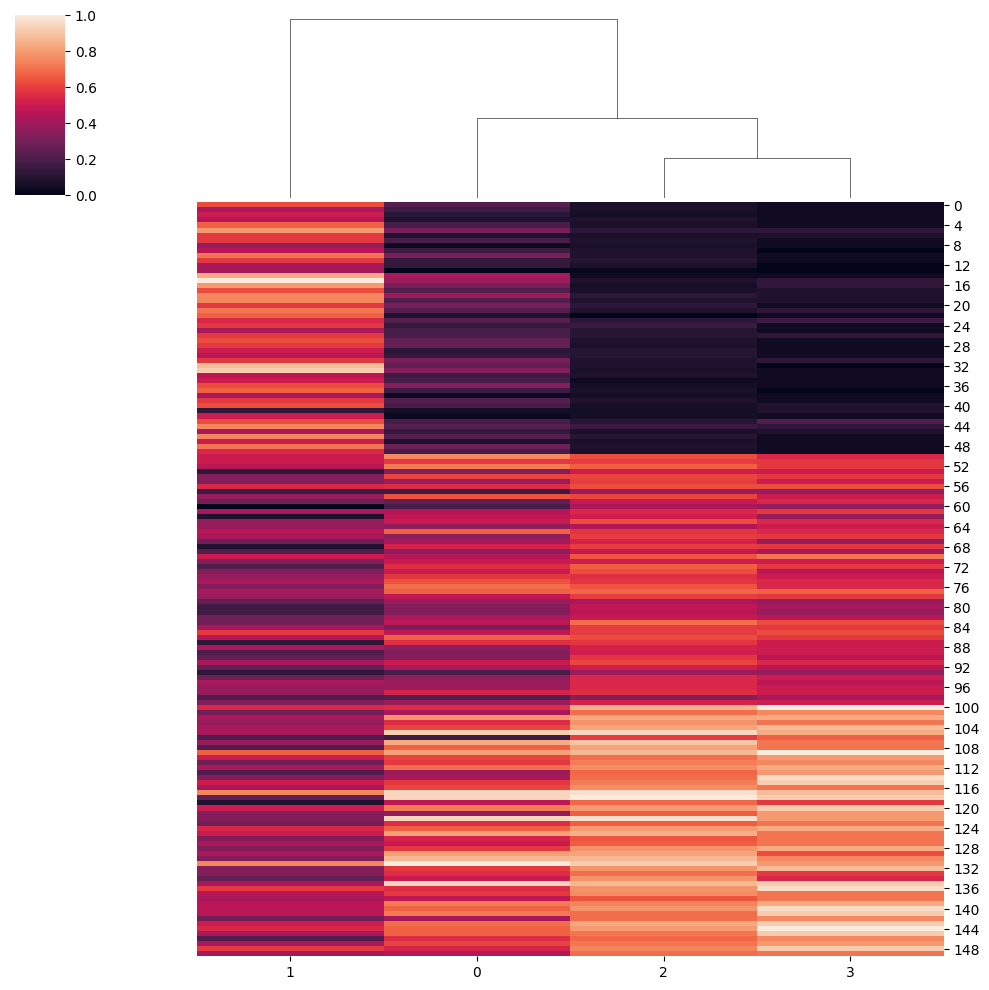

In [10]:
import seaborn as sns
sns.clustermap(X, row_cluster=False)
plt.show()
